# Задание

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

In [13]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
df=pd.DataFrame(data)
name2question = data.iloc[0]
data.drop(0, inplace=True)
data.head(5)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

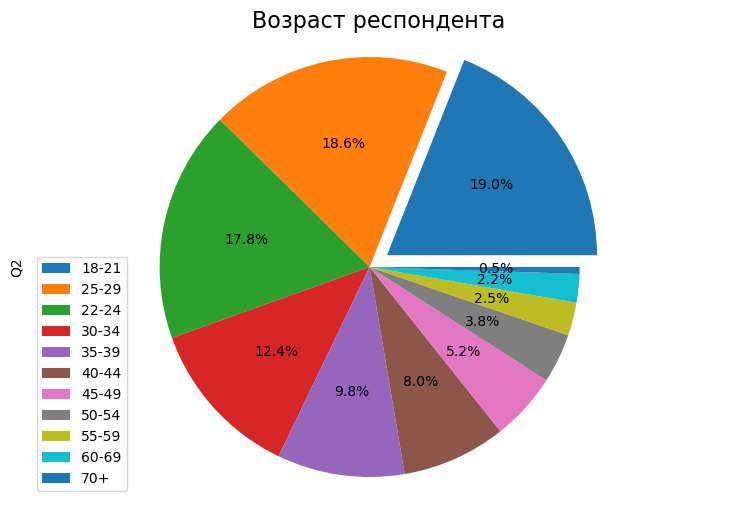

In [3]:
explode=[0.1,0,0,0,0,0,0,0,0,0,0]
data['Q2'].value_counts().plot(kind='pie', explode=explode, autopct='%1.1f%%', labels=None, figsize=(9, 6))
plt.legend(labels=data['Q2'].value_counts().index, loc='lower left')
plt.axis('equal') 
plt.title('Возраст респондентa', fontsize=16);

## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации. \
Отсортируй библиотеки по уменьшению популярности. Используй цветовую палитру 'colorblind'.

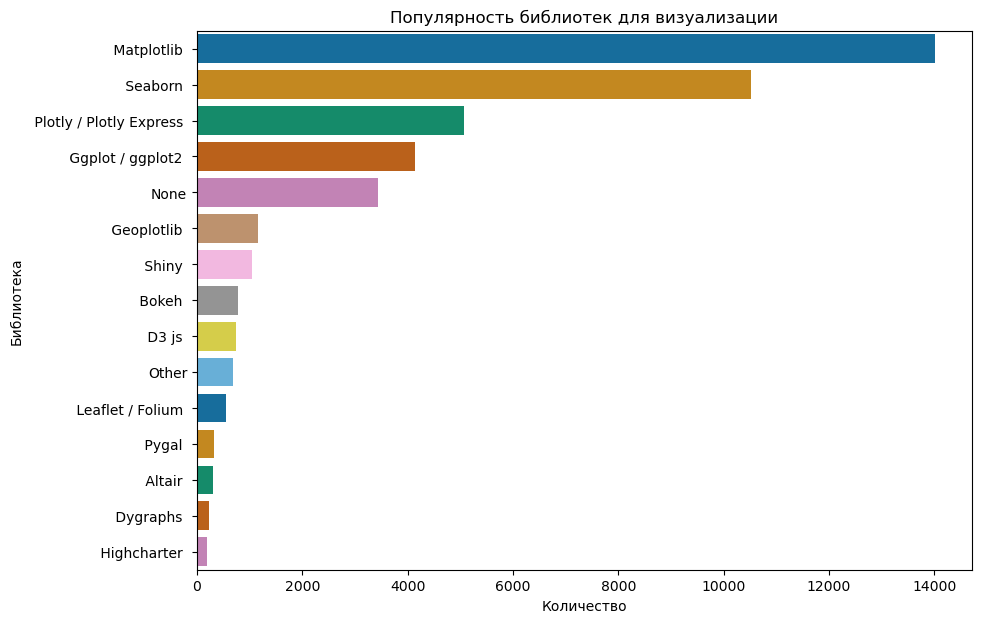

In [4]:
import seaborn as sns
library_columns = [col for col in data.columns if col.startswith('Q15')]
library = data[library_columns].melt(var_name='вопрос', value_vars=library_columns)
library_new=pd.DataFrame(library['value'].value_counts())

plt.figure(figsize=(10, 7))
f=sns.barplot(x=library_new.value, y=library_new.index,palette='colorblind')
plt.title('Популярность библиотек для визуализации', fontsize=12)
plt.xlabel('Количество')
plt.ylabel('Библиотека');

## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям. \
Отсортируй специальности по убыванию медианы заработка. Используй цветовую палитру 'colorblind'

In [17]:
salary = {
    '$0-999': 500, '1,000-1,999': 1500, '2,000-2,999': 2500, '3,000-3,999': 3500, '4,000-4,999': 4500, '5,000-7,499': 6250, '7,500-9,999': 8750,
    '10,000-14,999': 12500, '15,000-19,999': 17500, '20,000-24,999': 22500, '25,000-29,999': 27500, '30,000-39,999': 35000, '40,000-49,999': 45000, '50,000-59,999': 55000,
    '60,000-69,999': 65000, '70,000-79,999': 75000, '80,000-89,999': 85000, '90,000-99,999': 95000, '100,000-124,999': 112500, '125,000-149,999': 137500, '150,000-199,999': 175000,   
    '200,000-249,999': 225000, '250,000-299,999': 275000, '300,000-499,999': 400000, '$500,000-999,999': 750000, '>$1,000,000': 1000000,
}

In [18]:
data['Q29-NEW'] = data['Q29'].map(salary)

In [19]:
speciality = data[['Q23', 'Q29-NEW']].dropna()

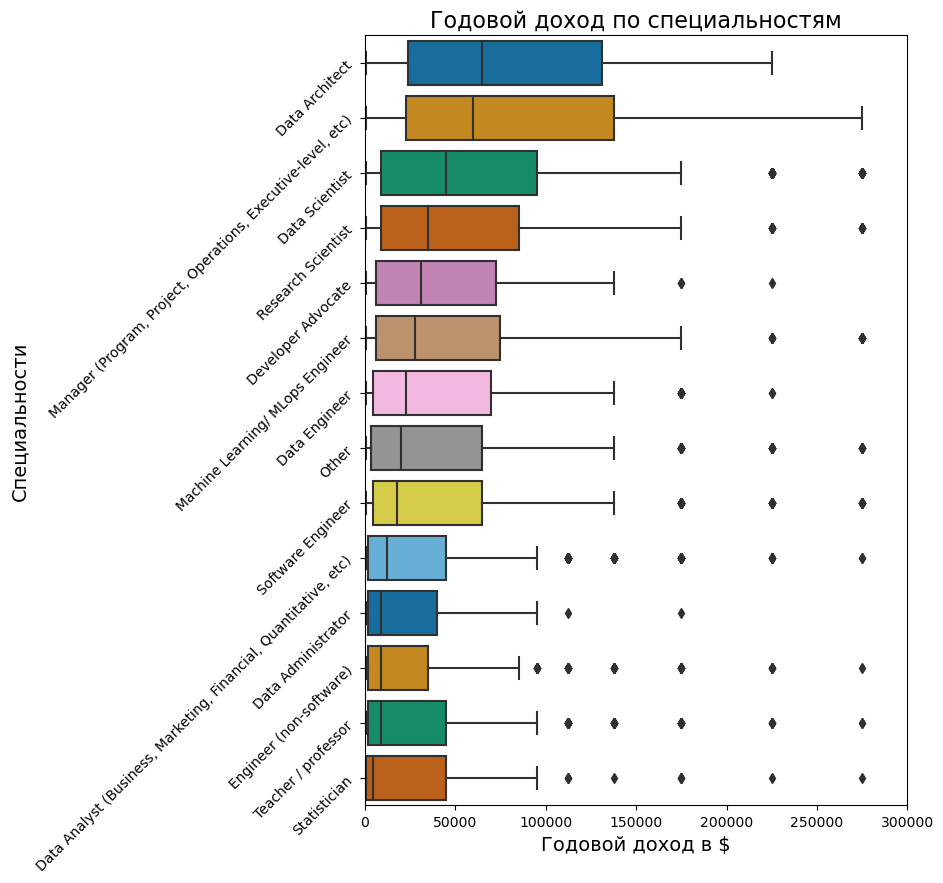

In [20]:
import seaborn as sns
x=data['Q29-NEW']
y=data['Q23']

fig,ax=plt.subplots(figsize=(7, 10))

sns.boxplot(x=x,
            y=y, data=speciality,
            palette='colorblind',
           order=speciality.groupby('Q23')['Q29-NEW'].median().sort_values(ascending=False).index)

ax.set_xlim([0, 300000])
ax.set_yticklabels(ax.get_yticklabels(),rotation=45)

plt.title('Годовой доход по специальностям', fontsize=16)
plt.xlabel('Годовой доход в $',fontsize=14 )
plt.ylabel('Специальности', fontsize=14);

## Задание 4
Используя модуль graph_objects из библиотеки plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect. \
Цвета в этом задании не важны

In [21]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [22]:
spec_list = [['Data Administrator', 'Data Analyst', 'Data Engineer'],  
             ['Data Scientist', 'Engineer', 'Machine Learning'], 
             ['Research Scientist', 'Software Engineer', 'Data Architect']]
title_list= ['Data Administrator', 'Data Analyst', 'Data Engineer',  
             'Data Scientist', 'Engineer', 'MLops Engineer', 
             'Research Scientist', 'Software Engineer', 'Data Architect']
data4 = data[data['Q23'].notna()] \
            .sort_values('Q23')[['Q2', 'Q23', 'Q4']] \
            .groupby(['Q23', 'Q2'], as_index=False) \
            .agg('count').rename(columns={'Q4': 'counter'})

In [23]:
fig2 = make_subplots(rows=len(spec_list), cols=len(spec_list[0]),
                     subplot_titles = ['<b><i>'+_+'</i></b>' for _ in title_list])
for i in range(len(spec_list)):
    for j in range(len(spec_list[0])):
        data5 = data4[data4.Q23.str.startswith(spec_list[i][j], na=False)]
        fig2.add_trace(go.Bar(x=data5.Q2, y=data5.counter, name=spec_list[i][j]), 
                       row=i+1, col=j+1)
fig2.update_layout(title='<i>Распределение возрастов по специальностям</i>',
                   height=600)

fig2.show()

## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом вам поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/). \
В аргументах функции укажи параметр color_continuous_scale="Viridis".

In [15]:
country= data['Q4'].value_counts()

fig = px.choropleth(data, locations=country.index,locationmode ='country names',
                    color=country, 
                    range_color=[0,1000],
                    labels={'color':'<b>Количество респондентов</b>'}, 
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(title = {'text': "<b>Карта Мира</b>",'x': 0.5, 'y': 0.95},width=900, height=700)

fig.show()


## Задание 6

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками. \
Загрузи итоговую визуализацию на гит в формате .gif.

In [8]:
# Код тутdata.drop(0, inplace=True)